In [1]:
import pandas as pd

df0 = pd.read_csv('/Users/djem/Desktop/data/aac_shelter_outcomes 2.csv')

print('Dataset info:')
df0.info()

print(df0.head())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  78248 non-null  object
 1   animal_id         78256 non-null  object
 2   animal_type       78256 non-null  object
 3   breed             78256 non-null  object
 4   color             78256 non-null  object
 5   date_of_birth     78256 non-null  object
 6   datetime          78256 non-null  object
 7   monthyear         78256 non-null  object
 8   name              54370 non-null  object
 9   outcome_subtype   35963 non-null  object
 10  outcome_type      78244 non-null  object
 11  sex_upon_outcome  78254 non-null  object
dtypes: object(12)
memory usage: 7.2+ MB
  age_upon_outcome animal_id animal_type                    breed  \
0          2 weeks   A684346         Cat   Domestic Shorthair Mix   
1           1 year   A666430         Dog              

In [2]:
missing_values = df0.isnull().sum()
print(missing_values)

print('Values by each coloumn')
print(df0.count())

age_upon_outcome        8
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                23886
outcome_subtype     42293
outcome_type           12
sex_upon_outcome        2
dtype: int64
Values by each coloumn
age_upon_outcome    78248
animal_id           78256
animal_type         78256
breed               78256
color               78256
date_of_birth       78256
datetime            78256
monthyear           78256
name                54370
outcome_subtype     35963
outcome_type        78244
sex_upon_outcome    78254
dtype: int64


In [3]:
# Total number of rows (we can take len(df) or max from your list)
total_rows = len(df0)


# Calculate missing ratio
missing_ratio = (missing_values / total_rows).sort_values(ascending=False)

# Display as percentage
missing_ratio_percentage = (missing_ratio * 100).round(2)

# Print the result
print("🔎 Percentage of missing values per column:")
print(missing_ratio_percentage)


🔎 Percentage of missing values per column:
outcome_subtype     54.04
name                30.52
outcome_type         0.02
age_upon_outcome     0.01
sex_upon_outcome     0.00
animal_id            0.00
animal_type          0.00
breed                0.00
color                0.00
date_of_birth        0.00
datetime             0.00
monthyear            0.00
dtype: float64


/var/folders/wl/s2d0f7l51w3gpcrn7gtnv0tc0000gn/T/ipykernel_33686/2536118223.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_ratio.values * 100, y=missing_ratio.index, palette='Blues_d')
/var/folders/wl/s2d0f7l51w3gpcrn7gtnv0tc0000gn/T/ipykernel_33686/2536118223.py:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/djem/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


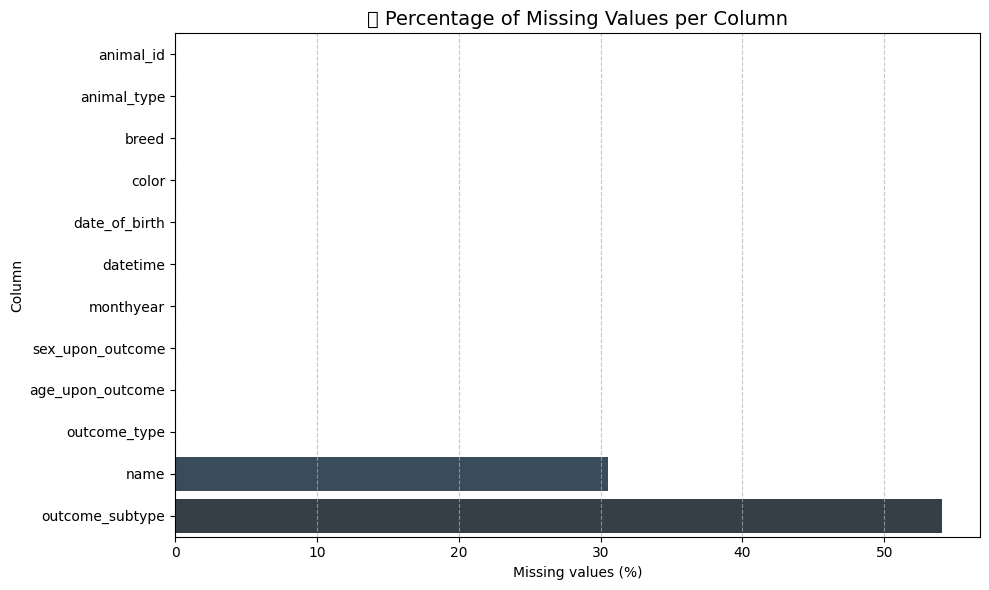

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total number of rows in the dataset
total_rows = len(df0)

# Calculate missing value count and ratio per column
missing_ratio = (missing_values / total_rows).sort_values(ascending=True)  # for prettier plot

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_ratio.values * 100, y=missing_ratio.index, palette='Blues_d')

plt.title("🔍 Percentage of Missing Values per Column", fontsize=14)
plt.xlabel("Missing values (%)")
plt.ylabel("Column")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [5]:
print(df0['outcome_type'].value_counts())

outcome_type
Adoption           33112
Transfer           23499
Return to Owner    14354
Euthanasia          6080
Died                 680
Disposal             307
Rto-Adopt            150
Missing               46
Relocate              16
Name: count, dtype: int64


In [6]:
# List of categorical columns to one-hot encode
categorical_cols = [
    'animal_type',
    'breed',
    'color',
    'sex_upon_outcome',
    # 'outcome_subtype',  # optional
    # 'monthyear',        # optional
]

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df0, columns=categorical_cols, drop_first=True)

# Show resulting shape and preview
print(f" Data shape after one-hot encoding: {df_encoded.shape}")
df_encoded.head()

 Data shape after one-hot encoding: (78256, 2667)


,age_upon_outcome,animal_id,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,animal_type_Cat,animal_type_Dog,...,color_Yellow/Gray,color_Yellow/Orange,color_Yellow/Orange Tabby,color_Yellow/Tan,color_Yellow/White,color_Yellow/Yellow,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
0,2 weeks,A684346,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,True,False,...,False,False,False,False,False,False,True,False,False,False
1,1 year,A666430,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,False,True,...,False,False,False,False,False,False,False,False,True,False
2,1 year,A675708,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,False,True,...,False,False,False,False,False,False,False,True,False,False
3,9 years,A680386,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,False,True,...,False,False,False,False,False,False,False,True,False,False
4,5 months,A683115,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Function to convert age string to number of days
import numpy as np

def age_to_days(age_str):
    if pd.isnull(age_str):
        return np.nan
    number, unit = age_str.split()
    number = int(number)
    if 'day' in unit:
        return number
    elif 'week' in unit:
        return number * 7
    elif 'month' in unit:
        return number * 30
    elif 'year' in unit:
        return number * 365
    return np.nan

# Apply the function
df_encoded['age_in_days'] = df_encoded['age_upon_outcome'].apply(age_to_days)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Columns: 2668 entries, age_upon_outcome to age_in_days
dtypes: bool(2659), float64(1), object(8)
memory usage: 203.8+ MB
None


In [8]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Columns: 2668 entries, age_upon_outcome to age_in_days
dtypes: bool(2659), float64(1), object(8)
memory usage: 203.8+ MB
None


In [9]:
#Convert date columns to datetime format
df_encoded['datetime'] = pd.to_datetime(df0['datetime'])
df_encoded['date_of_birth'] = pd.to_datetime(df0['date_of_birth'])

# print(df_1.dtypes)

df_encoded['hour'] = df_encoded['datetime'].dt.hour
df_encoded['weekday'] = df_encoded['datetime'].dt.weekday
df_encoded['month'] = df_encoded['datetime'].dt.month
df_encoded['year'] = df_encoded['datetime'].dt.year

df_encoded.rename(columns={
    'hour': 'outcome_hour',
    'weekday': 'outcome_weekday',
    'month': 'outcome_month',
    'year': 'outcome_year',
    'age_in_days': 'age_outcome_in_days'
}, inplace=True)

print(df_encoded.dtypes)

age_upon_outcome               object
animal_id                      object
date_of_birth          datetime64[ns]
datetime               datetime64[ns]
monthyear                      object
                            ...      
age_outcome_in_days           float64
outcome_hour                    int32
outcome_weekday                 int32
outcome_month                   int32
outcome_year                    int32
Length: 2672, dtype: object


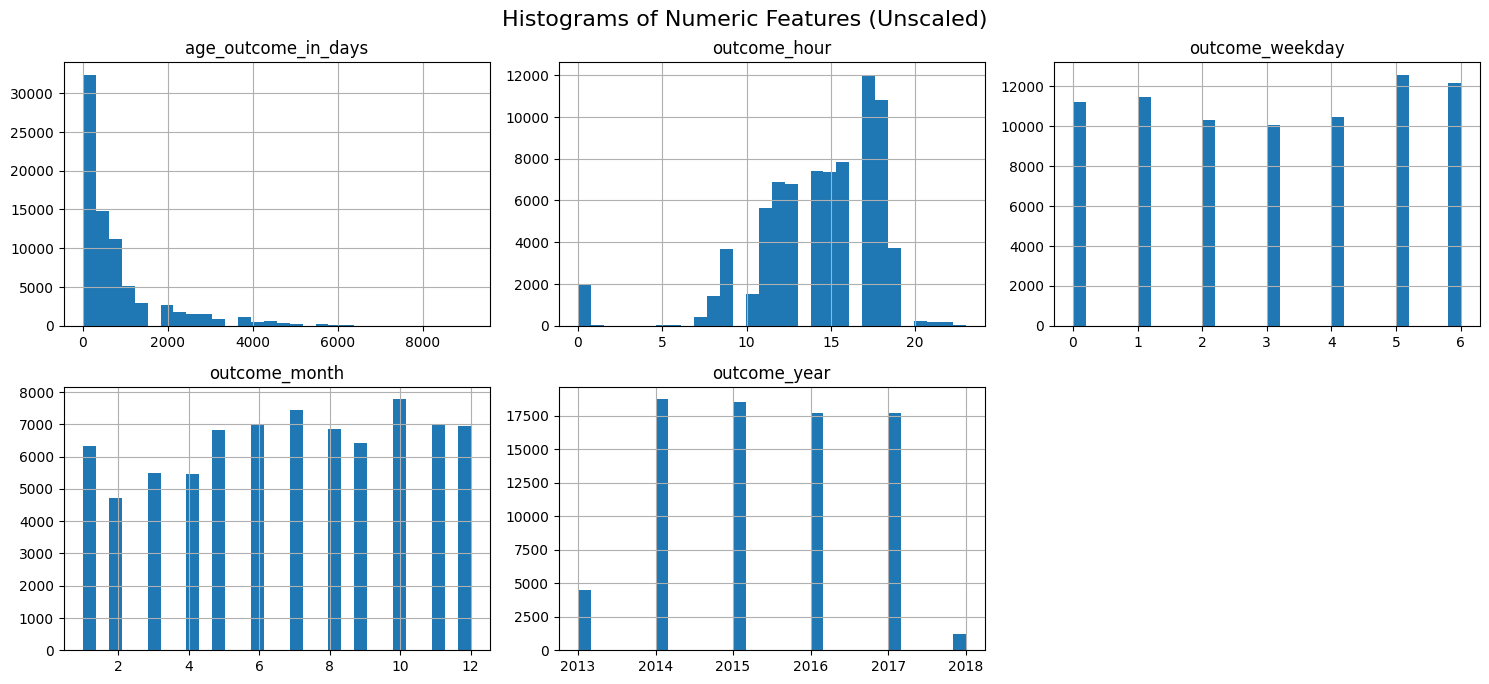

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df_encoded.select_dtypes(include='number').columns

df_encoded[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Histograms of Numeric Features (Unscaled)", fontsize=16)
plt.tight_layout()
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Log-transform skewed feature
df_encoded['age_outcome_in_days'] = np.log1p(df_encoded['age_outcome_in_days'])

# Select numeric columns for scaling
numeric_cols = ['age_outcome_in_days', 'outcome_hour', 'outcome_weekday', 'outcome_month', 'outcome_year']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

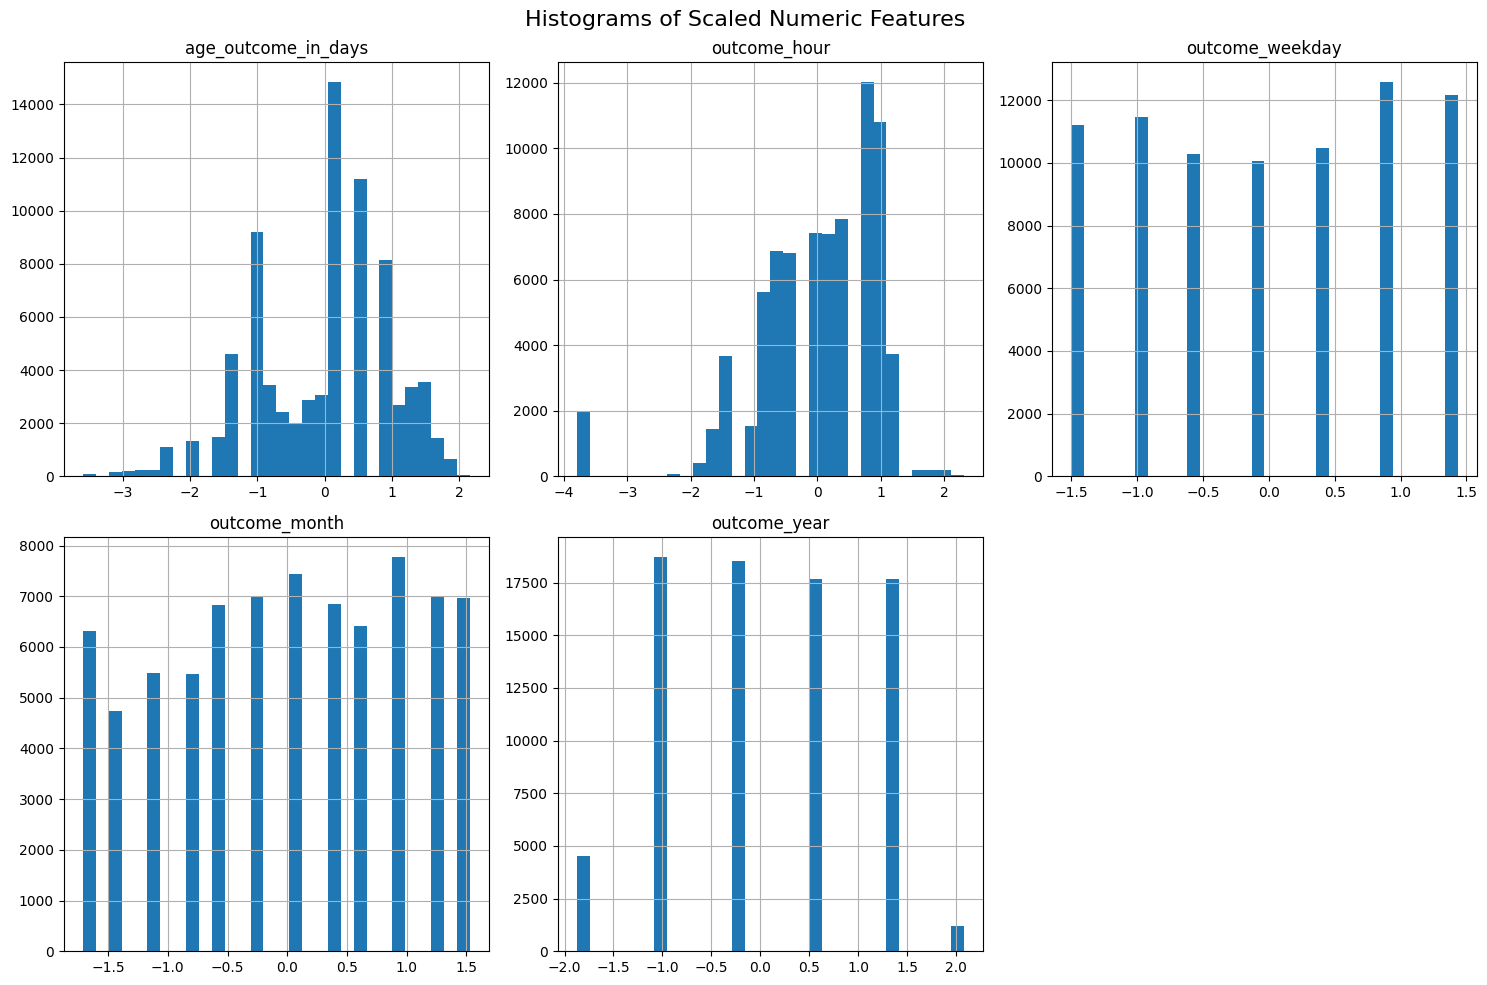

In [12]:
import matplotlib.pyplot as plt

# List of scaled features
scaled_cols = ['age_outcome_in_days', 'outcome_hour', 'outcome_weekday', 'outcome_month', 'outcome_year']

# Plot histograms of scaled features
df_encoded[scaled_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle("Histograms of Scaled Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
# Define positive outcomes
positive_outcomes = ['Adoption', 'Return to Owner']

# Create binary target column
df_encoded['outcome_binary'] = df_encoded['outcome_type'].apply(lambda x: 1 if x in positive_outcomes else 0)

print(df_encoded['outcome_binary'].value_counts())
df_encoded.drop(columns=['outcome_type'], inplace=True)

print(df_encoded.info())

outcome_binary
1    47466
0    30790
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Columns: 2672 entries, age_upon_outcome to outcome_binary
dtypes: bool(2659), datetime64[ns](2), float64(5), int64(1), object(5)
memory usage: 206.2+ MB
None


In [14]:
df_encoded.select_dtypes(include='object').columns

Index(['age_upon_outcome', 'animal_id', 'monthyear', 'name',
       'outcome_subtype'],
      dtype='object')

In [15]:
df_encoded['has_name'] = df_encoded['name'].notnull().astype(int)


In [16]:
df_encoded.drop(columns=['age_upon_outcome', 'animal_id', 'monthyear', 'name', 'outcome_subtype'], inplace=True)
df_encoded.drop(columns=['datetime', 'date_of_birth'], inplace=True)


In [17]:
df_encoded.dtypes.value_counts()

bool       2659
float64       5
int64         2
Name: count, dtype: int64

In [18]:
# For numeric columns
df_encoded['age_outcome_in_days'] = df_encoded['age_outcome_in_days'].fillna(df_encoded['age_outcome_in_days'].median())

In [19]:
missing_values = df_encoded.isna().sum().sum()
print(missing_values)

0


In [20]:
# Define features and target
X = df_encoded.drop(columns=['outcome_binary'])
y = df_encoded['outcome_binary']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

KNN Holdout

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import time

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define hyperparameter values
k_values = [3, 5]
weights_list = ['uniform']
metric = 'euclidean'

results = []

# Iterate through parameter combinations
for k in k_values:
    for weight in weights_list:
        model = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
        
        # Measure training and prediction time
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        end_time = time.time()
        
        runtime = end_time - start_time  # Time in seconds

        # Generate classification report and ROC AUC
        report = classification_report(y_test, y_pred, output_dict=True)
        auc = roc_auc_score(y_test, y_prob)

        # Save results
        results.append({
            'k': k,
            'weights': weight,
            'metric': metric,
            'accuracy': report['accuracy'],
            'precision': report['1']['precision'],
            'recall': report['1']['recall'],
            'f1': report['1']['f1-score'],
            'roc_auc': auc,
            'runtime_sec': runtime  # Model runtime in seconds
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results
results_df

,k,weights,metric,accuracy,precision,recall,f1,roc_auc,runtime_sec
0,3,uniform,euclidean,0.819001,0.821756,0.895934,0.857244,0.853081,68.646539
1,5,uniform,euclidean,0.829351,0.820901,0.919212,0.867280,0.869012,66.619819


CV

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import time

# Define parameter ranges
k_values = [3, 5]
weights_list = ['uniform']
metric = 'euclidean'

# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = []

# Iterate over parameter combinations
for k in k_values:
    for weight in weights_list:
        model = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
        
        # Measure cross-validation runtime
        start_time = time.time()
        scores = cross_validate(model, X, y, cv=3, scoring=scoring)
        end_time = time.time()
        runtime = end_time - start_time  # Time in seconds

        # Save mean metrics and runtime
        results.append({
            'k': k,
            'weights': weight,
            'metric': metric,
            'accuracy': np.mean(scores['test_accuracy']),
            'precision': np.mean(scores['test_precision']),
            'recall': np.mean(scores['test_recall']),
            'f1': np.mean(scores['test_f1']),
            'roc_auc': np.mean(scores['test_roc_auc']),
            'runtime_sec': runtime  # Cross-validation runtime
        })

# Convert to DataFrame for analysis
results_df = pd.DataFrame(results)

# Display the results
results_df

,k,weights,metric,accuracy,precision,recall,f1,roc_auc,runtime_sec
0,3,uniform,euclidean,0.797882,0.815537,0.861143,0.836958,0.833855,281.748229
1,5,uniform,euclidean,0.808207,0.814489,0.884928,0.847605,0.850559,279.025134


Decision Tree Holdout

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
import time
import pandas as pd

# Search parameters
max_depths = [5, 10, 15]
min_splits = [2, 5, 10]

results_tree_holdout = []

for depth in max_depths:
    for split in min_splits:
        model = DecisionTreeClassifier(
            max_depth=depth,
            min_samples_split=split,
            random_state=42
        )

        start = time.time()

        # Holdout evaluation
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        report = classification_report(y_test, y_pred, output_dict=True)
        auc = roc_auc_score(y_test, y_prob)
        runtime = time.time() - start

        results_tree_holdout.append({
            'model': 'Decision Tree',
            'max_depth': depth,
            'min_samples_split': split,
            'evaluation': 'Holdout',
            'accuracy': report['accuracy'],
            'precision': report['1']['precision'],
            'recall': report['1']['recall'],
            'f1': report['1']['f1-score'],
            'roc_auc': auc,
            'runtime_sec': runtime
        })

# Convert to DataFrame
results_tree_holdout_df = pd.DataFrame(results_tree_holdout)

# Show Top 5 results
print("🔹 Top 5 Decision Tree Holdout results by f1:")
display(results_tree_holdout_df.sort_values(by='f1', ascending=False).head(5))

🔹 Top 5 Decision Tree Holdout results by f1:


,model,max_depth,min_samples_split,evaluation,accuracy,precision,recall,f1,roc_auc,runtime_sec
4,Decision Tree,10,5,Holdout,0.848390,0.834351,0.935854,0.882192,0.899724,2.803920
5,Decision Tree,10,10,Holdout,0.848262,0.834131,0.935960,0.882116,0.900390,2.816462
3,Decision Tree,10,2,Holdout,0.848262,0.834194,0.935854,0.882105,0.899349,2.721065
6,Decision Tree,15,2,Holdout,0.846665,0.835572,0.930272,0.880383,0.883131,3.357107
7,Decision Tree,15,5,Holdout,0.846282,0.836371,0.928165,0.879880,0.887491,3.279380


Decision Tree CV

In [25]:
from sklearn.model_selection import cross_validate
import numpy as np

results_tree_cv = []

for depth in max_depths:
    for split in min_splits:
        model = DecisionTreeClassifier(
            max_depth=depth,
            min_samples_split=split,
            random_state=42
        )

        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        cv_scores = cross_validate(model, X, y, cv=5, scoring=scoring)

        results_tree_cv.append({
            'model': 'Decision Tree',
            'max_depth': depth,
            'min_samples_split': split,
            'evaluation': 'Cross-Validation',
            'accuracy': np.mean(cv_scores['test_accuracy']),
            'precision': np.mean(cv_scores['test_precision']),
            'recall': np.mean(cv_scores['test_recall']),
            'f1': np.mean(cv_scores['test_f1']),
            'roc_auc': np.mean(cv_scores['test_roc_auc']),
            'runtime_sec': None
        })

# Convert to DataFrame
results_tree_cv_df = pd.DataFrame(results_tree_cv)

# Show Top 5 results
print("🔸 Top 5 Decision Tree Cross-Validation results by f1:")
display(results_tree_cv_df.sort_values(by='f1', ascending=False).head(5))


🔸 Top 5 Decision Tree Cross-Validation results by f1:


,model,max_depth,min_samples_split,evaluation,accuracy,precision,recall,f1,roc_auc,runtime_sec
5,Decision Tree,10,10,Cross-Validation,0.843105,0.830181,0.931910,0.878093,0.892970,None
3,Decision Tree,10,2,Cross-Validation,0.842785,0.830259,0.931109,0.877769,0.890895,None
4,Decision Tree,10,5,Cross-Validation,0.842722,0.830059,0.931320,0.877762,0.891092,None
0,Decision Tree,5,2,Cross-Validation,0.831451,0.795621,0.972464,0.875091,0.875514,None
1,Decision Tree,5,5,Cross-Validation,0.831451,0.795621,0.972464,0.875091,0.875514,None


MLP Holdout

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
import time
import pandas as pd

# Define hyperparameters
hidden_layers = [(50,), (100,), (50, 50)]
activations = ['relu', 'tanh']
solvers = ['adam']

results_mlp_holdout = []

for hidden in hidden_layers:
    for activation in activations:
        for solver in solvers:
            model = MLPClassifier(
                hidden_layer_sizes=hidden,
                activation=activation,
                solver=solver,
                random_state=42,
                max_iter=200
            )

            start = time.time()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1]

            report = classification_report(y_test, y_pred, output_dict=True)
            auc = roc_auc_score(y_test, y_prob)
            runtime = time.time() - start

            results_mlp_holdout.append({
                'model': 'MLP',
                'hidden_layer_sizes': hidden,
                'activation': activation,
                'solver': solver,
                'evaluation': 'Holdout',
                'accuracy': report['accuracy'],
                'precision': report['1']['precision'],
                'recall': report['1']['recall'],
                'f1': report['1']['f1-score'],
                'roc_auc': auc,
                'runtime_sec': runtime
            })

# Create DataFrame and display best results
results_mlp_holdout_df = pd.DataFrame(results_mlp_holdout)
print("🔹 Top 5 MLP (Holdout) results by f1:")
display(results_mlp_holdout_df.sort_values(by='f1', ascending=False).head(5))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

🔹 Top 5 MLP (Holdout) results by f1:


,model,hidden_layer_sizes,activation,solver,evaluation,accuracy,precision,recall,f1,roc_auc,runtime_sec
1,MLP,"(50,)",tanh,adam,Holdout,0.832481,0.834371,0.903097,0.867375,0.889191,393.691596
0,MLP,"(50,)",relu,adam,Holdout,0.828393,0.837030,0.890457,0.862917,0.881991,502.044559
3,MLP,"(100,)",tanh,adam,Holdout,0.825070,0.840044,0.878976,0.859069,0.885972,850.921682
5,MLP,"(50, 50)",tanh,adam,Holdout,0.818426,0.839665,0.866021,0.852639,0.875846,438.485060
4,MLP,"(50, 50)",relu,adam,Holdout,0.814209,0.839555,0.857594,0.848479,0.867408,429.052710


MLP CV

In [27]:
from sklearn.model_selection import cross_validate
import numpy as np

results_mlp_cv = []

for hidden in hidden_layers:
    for activation in activations:
        for solver in solvers:
            model = MLPClassifier(
                hidden_layer_sizes=hidden,
                activation=activation,
                solver=solver,
                random_state=42,
                max_iter=200
            )

            scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
            cv_scores = cross_validate(model, X, y, cv=5, scoring=scoring)

            results_mlp_cv.append({
                'model': 'MLP',
                'hidden_layer_sizes': hidden,
                'activation': activation,
                'solver': solver,
                'evaluation': 'Cross-Validation',
                'accuracy': np.mean(cv_scores['test_accuracy']),
                'precision': np.mean(cv_scores['test_precision']),
                'recall': np.mean(cv_scores['test_recall']),
                'f1': np.mean(cv_scores['test_f1']),
                'roc_auc': np.mean(cv_scores['test_roc_auc']),
                'runtime_sec': None
            })

# Create DataFrame and display best results
results_mlp_cv_df = pd.DataFrame(results_mlp_cv)
print("🔸 Top 5 MLP (Cross-Validation) results by f1:")
display(results_mlp_cv_df.sort_values(by='f1', ascending=False).head(5))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

🔸 Top 5 MLP (Cross-Validation) results by f1:


,model,hidden_layer_sizes,activation,solver,evaluation,accuracy,precision,recall,f1,roc_auc,runtime_sec
3,MLP,"(100,)",tanh,adam,Cross-Validation,0.819823,0.836154,0.874607,0.854113,0.881584,None
1,MLP,"(50,)",tanh,adam,Cross-Validation,0.820066,0.836155,0.875345,0.854105,0.882093,None
0,MLP,"(50,)",relu,adam,Cross-Validation,0.817650,0.837098,0.869067,0.851509,0.878376,None
2,MLP,"(100,)",relu,adam,Cross-Validation,0.813267,0.833905,0.864811,0.848144,0.873462,None
5,MLP,"(50, 50)",tanh,adam,Cross-Validation,0.811951,0.833812,0.861692,0.846955,0.873133,None
